In [46]:
!pip install kaggle

In [52]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [53]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [54]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [55]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [56]:
m = os.listdir('/content/data/with_mask')

In [57]:
p = os.listdir('/content/data/without_mask')

In [58]:
m[0:5]

['with_mask_3423.jpg',
 'with_mask_1524.jpg',
 'with_mask_2710.jpg',
 'with_mask_1847.jpg',
 'with_mask_722.jpg']

In [59]:
p[0:5]

['without_mask_2285.jpg',
 'without_mask_1349.jpg',
 'without_mask_2734.jpg',
 'without_mask_1008.jpg',
 'without_mask_1524.jpg']

In [62]:
len(m)

3725

In [61]:
len(p)

3828

In [63]:
ml = [1] * len(m)

In [64]:
pl = [0] * len(p)

In [65]:
ml[0:5]

[1, 1, 1, 1, 1]

In [66]:
pl[0:5]

[0, 0, 0, 0, 0]

In [67]:
l = ml + pl

In [68]:
l[0:5]

[1, 1, 1, 1, 1]

In [69]:
l[-5:]

[0, 0, 0, 0, 0]

In [70]:
i = mpimg.imread('/content/data/with_mask/with_mask_10.jpg')

In [71]:

i

array([[[101,  45,   0],
        [104,  48,   1],
        [114,  58,   9],
        ...,
        [ 90,  56,  29],
        [ 92,  58,  31],
        [ 88,  53,  31]],

       [[136,  80,  33],
        [140,  84,  37],
        [144,  88,  39],
        ...,
        [ 82,  48,  21],
        [ 81,  47,  22],
        [ 87,  52,  30]],

       [[138,  82,  35],
        [140,  84,  37],
        [136,  80,  33],
        ...,
        [ 76,  42,  15],
        [ 72,  38,  13],
        [ 77,  42,  20]],

       ...,

       [[187, 146,  80],
        [184, 143,  77],
        [185, 144,  78],
        ...,
        [207, 169, 104],
        [203, 165, 100],
        [185, 146,  81]],

       [[191, 151,  82],
        [188, 148,  79],
        [182, 142,  73],
        ...,
        [209, 172, 104],
        [209, 172, 104],
        [196, 157,  90]],

       [[192, 152,  83],
        [189, 149,  80],
        [185, 145,  76],
        ...,
        [216, 179, 111],
        [217, 180, 112],
        [207, 168, 101]]

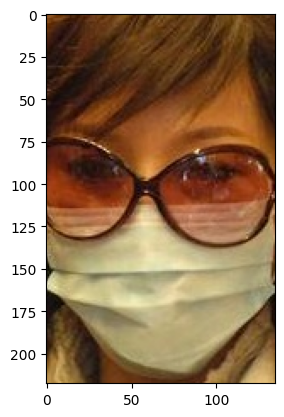

In [72]:
ip = plt.imshow(i)

In [73]:
im = mpimg.imread('/content/data/without_mask/without_mask_1.jpg')

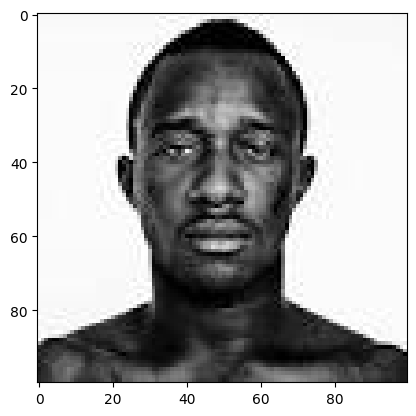

In [74]:
ipm = plt.imshow(im)

In [76]:
mi = '/content/data/with_mask/'
pi = '/content/data/without_mask/'

In [77]:
data = []

for o in m:
  ii = Image.open(mi + o )
  ii = ii.resize((128,128))
  ii = ii.convert('RGB')
  ii = np.array(ii)
  data.append(ii)



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [78]:

for o in p:
  ii = Image.open(pi + o )
  ii = ii.resize((128,128))
  ii = ii.convert('RGB')
  ii = np.array(ii)
  data.append(ii)



In [79]:
data[0]

array([[[165, 157, 147],
        [101,  86,  75],
        [125, 102,  89],
        ...,
        [171, 173, 159],
        [183, 184, 173],
        [183, 184, 178]],

       [[155, 147, 137],
        [ 96,  82,  70],
        [125, 103,  89],
        ...,
        [172, 174, 160],
        [182, 184, 173],
        [184, 185, 179]],

       [[150, 143, 132],
        [ 96,  81,  70],
        [126, 103,  90],
        ...,
        [176, 178, 164],
        [182, 184, 173],
        [184, 185, 179]],

       ...,

       [[158,  22,  50],
        [173,  13,  49],
        [191,   1,  46],
        ...,
        [142, 126, 115],
        [146, 130, 119],
        [127, 110, 102]],

       [[192,   2,  44],
        [193,   0,  43],
        [197,   0,  44],
        ...,
        [145, 128, 118],
        [147, 130, 119],
        [128, 110, 103]],

       [[192,   0,  40],
        [191,   0,  40],
        [191,   2,  43],
        ...,
        [145, 128, 118],
        [145, 128, 118],
        [131, 114, 107]]

In [80]:
X = np.array(data)

In [81]:
Y = np.array(l)

In [82]:
X.shape

(7553, 128, 128, 3)

In [83]:
Y.shape

(7553,)

In [84]:
x_t , x_te , y_t , y_te = train_test_split(X,Y,test_size=0.2,stratify=Y , random_state=2)

In [85]:
x_t.shape

(6042, 128, 128, 3)

In [86]:
x_te.shape

(1511, 128, 128, 3)

In [87]:
y_t.shape

(6042,)

In [54]:
y_te.shape

(1511,)

In [89]:
x_tm = x_t/255
x_tem = x_te/255

In [90]:
x_tm[0]

array([[[0.01960784, 0.5372549 , 0.55294118],
        [0.01568627, 0.5372549 , 0.55294118],
        [0.00392157, 0.54509804, 0.55294118],
        ...,
        [0.56078431, 0.43137255, 0.35686275],
        [0.59215686, 0.4627451 , 0.38823529],
        [0.60784314, 0.48627451, 0.41960784]],

       [[0.02745098, 0.55294118, 0.58431373],
        [0.01568627, 0.54901961, 0.57254902],
        [0.        , 0.53333333, 0.55686275],
        ...,
        [0.56078431, 0.43529412, 0.35686275],
        [0.58039216, 0.45882353, 0.37647059],
        [0.58039216, 0.45490196, 0.38431373]],

       [[0.01568627, 0.55294118, 0.60392157],
        [0.00392157, 0.54509804, 0.59215686],
        [0.        , 0.52156863, 0.57254902],
        ...,
        [0.50588235, 0.38823529, 0.29803922],
        [0.56470588, 0.44705882, 0.35686275],
        [0.58039216, 0.45490196, 0.37647059]],

       ...,

       [[0.09019608, 0.15294118, 0.15686275],
        [0.1254902 , 0.19607843, 0.19607843],
        [0.23137255, 0

In [91]:
import tensorflow as tf

In [92]:
from  tensorflow import keras

In [93]:
n = 2

model = keras.Sequential()

In [94]:
model.add(keras.layers.Conv2D(32,kernel_size=(3,3), activation='relu' , input_shape = (128,128,3)))

In [95]:
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

In [96]:
model.add(keras.layers.Conv2D(64,kernel_size=(3,3), activation='relu' ))

In [98]:
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))

In [100]:
model.add(keras.layers.Flatten())

In [99]:
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(n,activation='sigmoid'))



In [101]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [102]:
h = model.fit(x_tm , y_t , validation_split=0.1 , epochs=5)

Epoch 1/5
170/170 [==============================] - 12s 30ms/step - loss: 5.8650 - acc: 0.0136 - val_loss: 5.6453 - val_acc: 0.0678
Epoch 2/5
170/170 [==============================] - 4s 24ms/step - loss: 5.6687 - acc: 0.0118 - val_loss: 5.6236 - val_acc: 0.0298
Epoch 3/5
170/170 [==============================] - 4s 25ms/step - loss: 5.5546 - acc: 0.0204 - val_loss: 5.4325 - val_acc: 0.0314
Epoch 4/5
170/170 [==============================] - 4s 24ms/step - loss: 5.4689 - acc: 0.0250 - val_loss: 5.3955 - val_acc: 0.0463
Epoch 5/5
170/170 [==============================] - 4s 23ms/step - loss: 5.4190 - acc: 0.0257 - val_loss: 5.3686 - val_acc: 0.0628


In [103]:
loss , accuracy = model.evaluate(x_tem , y_te)

48/48 [==============================] - 1s 11ms/step - loss: 5.3248 - acc: 0.0655


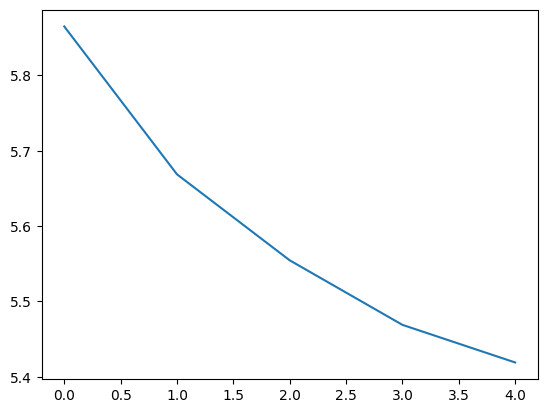

In [104]:
k = h

plt.plot(k.history['loss'])

In [105]:
import cv2

In [113]:
del input

In [114]:
impP = input('Path of the image to be predicted: ')


Path of the image to be predicted: /content/download.webp


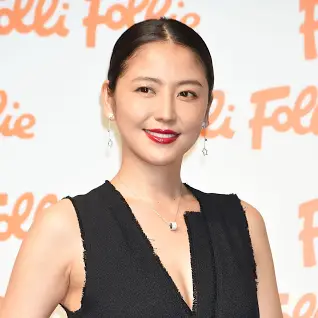

1/1 [==============================] - 0s 130ms/step
mask ella no mask mask mno ekla no m


In [115]:

imop = cv2.imread(impP)

cv2_imshow(imop)

l = cv2.resize(imop , (128,128))

lm = l/255

iml = np.reshape(lm,[1,128,128,3])

inputt = model.predict(iml)

p = np.argmax(inputt)

if(p == 1 ):
  print("mask")
else:
  print("mask ella no mask mask mno ekla no m")